In [78]:
import matplotlib.pyplot as plt
import pandas as pd

### Leitura dos dados

In [79]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
df.shape

(200, 5)

### Verificar dados nulos

In [81]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Informações estatísticas

In [82]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico da idade versus score do cliente

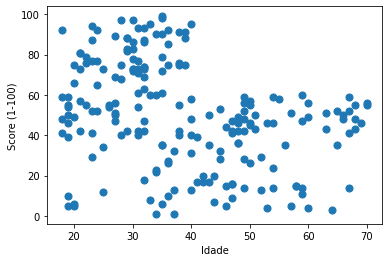

In [83]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

Selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com kmeans

In [84]:
# selecione no dataframe df as colunas Age e Spending Score (1-100)
dataset = df[['Age', 'Spending Score (1-100)']]
dataset.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### Clusterizando com k = 5

In [85]:
# Importando K-means
from sklearn.cluster import KMeans

# clusterizando com k = 5
modelo_kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = modelo_kmeans.fit_predict(dataset)

# visualizando o primeiro grupo criado
print(dataset[y_kmeans == 0])

     Age  Spending Score (1-100)
1     21                      81
3     23                      77
5     22                      76
7     23                      94
9     30                      72
11    35                      99
13    24                      77
15    22                      79
19    35                      98
21    25                      73
23    31                      73
25    29                      82
29    23                      87
31    21                      73
33    18                      92
35    21                      81
37    30                      73
39    20                      75
41    24                      92
123   39                      91
125   31                      77
127   40                      95
129   38                      75
131   39                      75
133   31                      71
135   29                      88
137   32                      73
139   35                      72
141   32                      93
143   32  

### Visualizando todos os grupos

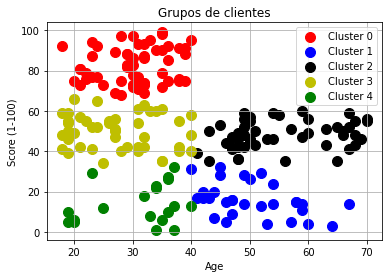

In [86]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = dataset[y_kmeans == k]
    plt.scatter(cluster['Age'],
                cluster['Spending Score (1-100)'],
                s=100,
                c=cores[k],
                label=f'Cluster {k}'
                )

plt.title('Grupos de clientes')
plt.xlabel('Age')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()